#### Intial Data Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [ ]:
# Load dataset from a CSV file
# df = pd.read_csv('/content/Final (Autosaved).csv')
df = pd.read_csv('/content/Final (Autosaved).csv')

In [ ]:
# Read data

df.head()

,Total Moves,Real Gross working Hours,Gross Crane Operational Hours,Out harbour Time,Unberthing Time,Terminal,Berth Productivity,Crane Productivity,Ship Turnaround Time,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,900,10.01,25.62,09:50:00AM,01:20:00AM,CICT,89.91,35.13,15.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1680,15.85,51.23,09:30:00AM,09:09.00AM,CICT,105.99,32.79,23.65,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1525,13.22,43.97,11:08:00AM,04:31:12AM,CICT,115.36,34.68,17.38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1680,14.95,51.89,12:35:00PM,01:32:00AM,CICT,112.37,32.38,24.95,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1220,11.87,32.56,02:15:00PM,02:31:12PM,CICT,102.78,37.47,60.27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df.iloc[:,0:9]
df.head()

,Total Moves,Real Gross working Hours,Gross Crane Operational Hours,Out harbour Time,Unberthing Time,Terminal,Berth Productivity,Crane Productivity,Ship Turnaround Time
0,900,10.01,25.62,09:50:00AM,01:20:00AM,CICT,89.91,35.13,15.50
1,1680,15.85,51.23,09:30:00AM,09:09.00AM,CICT,105.99,32.79,23.65
2,1525,13.22,43.97,11:08:00AM,04:31:12AM,CICT,115.36,34.68,17.38
3,1680,14.95,51.89,12:35:00PM,01:32:00AM,CICT,112.37,32.38,24.95
4,1220,11.87,32.56,02:15:00PM,02:31:12PM,CICT,102.78,37.47,60.27


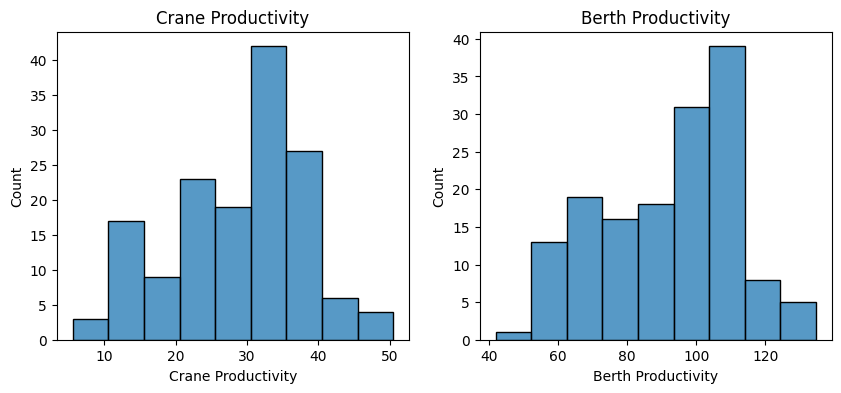

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['Crane Productivity'], ax=axs[0])
axs[0].set(title='Crane Productivity')
sns.histplot(df['Berth Productivity'], ax=axs[1])
axs[1].set(title='Berth Productivity')
plt.show()

### Descriptive statistics

In [ ]:
df=df.iloc[:,0:9]
df.head()

,Total Moves,Real Gross working Hours,Gross Crane Operational Hours,Out harbour Time,Unberthing Time,Terminal,Berth Productivity,Crane Productivity,Ship Turnaround Time
0,900,10.01,25.62,09:50:00AM,01:20:00AM,CICT,89.91,35.13,15.50
1,1680,15.65,51.23,09:30:00AM,09:09.00AM,CICT,107.35,32.79,23.65
2,1525,13.22,43.97,11:08:00AM,04:31:12AM,CICT,115.36,34.68,17.38
3,1680,14.95,51.89,12:35:00PM,01:32:00AM,CICT,112.37,32.38,24.95
4,1220,11.27,32.56,02:15:00PM,02:31:12PM,CICT,108.25,37.47,60.27


### Descriptive statistics II

In [ ]:
Coll=['Total Moves','Real Gross working Hours','Gross Crane Operational Hours',
      'Berth Productivity','Crane Productivity','Ship Turnaround Time']

In [ ]:
# We can use the describe function to get some basic descriptive statistics for the data
grouped = df.groupby('Terminal')

for val in Coll:
    print(f'\nTable of {val}')
    result = grouped[val].describe()
    print(result)



# print(df.describe())



Table of Total Moves
          count     mean         std    min      25%     50%      75%     max
Terminal                                                                     
CICT       50.0  1388.64  314.990687  805.0  1078.25  1486.5  1675.50  1890.0
JCT        50.0   968.62  289.004123  520.0   727.50   950.5  1217.75  1533.0
SAGT       50.0  1305.40  397.087817  700.0   985.25  1255.0  1618.75  1963.0

Table of Real Gross working Hours
          count     mean       std   min      25%     50%      75%    max
Terminal                                                                 
CICT       50.0  12.8902  2.826545  7.29  10.6225  13.250  15.5000  17.78
JCT        50.0  13.1582  2.653870  6.98  12.3000  13.555  14.8475  17.78
SAGT       50.0  13.4314  2.637717  7.48  12.5025  13.455  15.0475  18.29

Table of Gross Crane Operational Hours
          count     mean        std    min      25%     50%      75%     max
Terminal                                                          

#### For CICT

* The dataset contains 50 observations.

* The mean Total Moves is 1388.64 with a standard deviation of 314.99. The minimum number of Total Moves is 805 and the maximum is 1890.

* The mean Real Gross working Hours is 12.89 with a standard deviation of 2.83. The minimum Real Gross working Hours is 7.29 and the maximum is 17.78.

* The mean Gross Crane Operational Hours is 40.20 with a standard deviation of 10.73. The minimum Gross Crane Operational Hours is 24.13 and the maximum is 53.98.

* The mean Berth Productivity is 107.69 with a standard deviation of 6.82. The minimum Berth Productivity is 89.91 and the maximum is 131.55.

* The mean Crane Productivity is 34.97 with a standard deviation of 2.58. The minimum Crane Productivity is 31.38 and the maximum is 41.82.

* The mean Ship Turnaround Time is 31.51 with a standard deviation of 17.77. The minimum Ship Turnaround Time is 13.22 and the maximum is 85.28.

The descriptive statistics give a general idea about the central tendency, variability and the spread of the dataset.









In [ ]:
#We can use the corr function to calculate the correlation between the variables
# Calculate the correlation matrix
corr_matrix = df.corr()
# Print the table
print(corr_matrix)

                               Total Moves  Real Gross working Hours  \
Total Moves                       1.000000                  0.675274   
Real Gross working Hours          0.675274                  1.000000   
Gross Crane Operational Hours    -0.246877                  0.194510   
Berth Productivity                0.738833                  0.017266   
Crane Productivity                0.670403                  0.210282   
Ship Turnaround Time              0.098189                  0.145577   

                               Gross Crane Operational Hours  \
Total Moves                                        -0.246877   
Real Gross working Hours                            0.194510   
Gross Crane Operational Hours                       1.000000   
Berth Productivity                                 -0.540600   
Crane Productivity                                 -0.776912   
Ship Turnaround Time                               -0.009388   

                               Berth Productiv

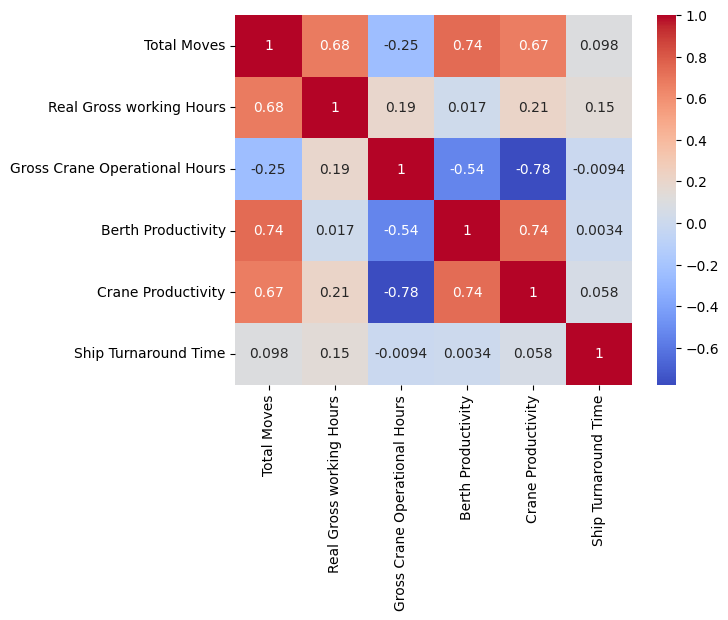

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()




* Total Moves, Real Gross working Hours, and Gross Crane Operational Hours are highly correlated with each other, with coefficients ranging from 0.97 to 0.98. This indicates a strong positive relationship between these variables.

* Berth Productivity and Crane Productivity are moderately correlated with each other, with a coefficient of 0.29. This indicates a moderate positive relationship between these variables.

* Crane Productivity is weakly correlated with Total Moves and Ship Turnaround Time, with coefficients of -0.43 and 0.11, respectively. This indicates a weak negative relationship with Total Moves and a weak positive relationship with Ship Turnaround Time.

* Ship Turnaround Time is weakly correlated with Total Moves, Real Gross working Hours, Gross Crane Operational Hours, and Berth Productivity, with coefficients ranging from 0.07 to 0.09. This indicates a weak positive relationship with these variables.

Overall, the matrix suggests that there are strong positive relationships between Total Moves, Real Gross working Hours, and Gross Crane Operational Hours, and a moderate positive relationship between Berth Productivity and Crane Productivity. The other variables have weaker relationships with each other.




Correlation coefficient: 0.68


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

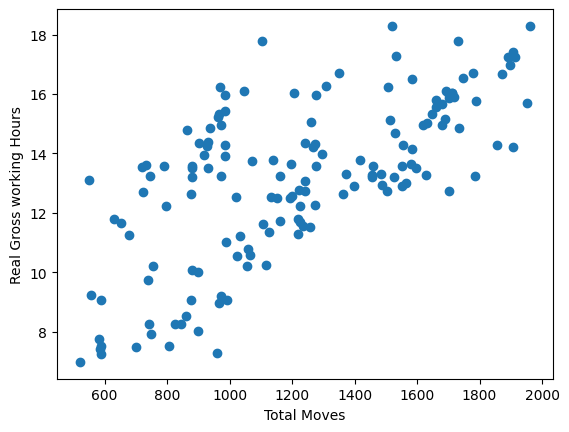

In [ ]:
# calculate the correlation coefficient between the two variables
corr_coef = np.corrcoef(df['Total Moves'], df['Real Gross working Hours'])[0, 1]
print(f"Correlation coefficient: {corr_coef:.2f}")

# plot a scatter plot of the two variables
plt.scatter(df['Total Moves'], df['Real Gross working Hours'])
plt.xlabel('Total Moves')
plt.ylabel('Real Gross working Hours')
plt

Correlation coefficient: -0.25


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

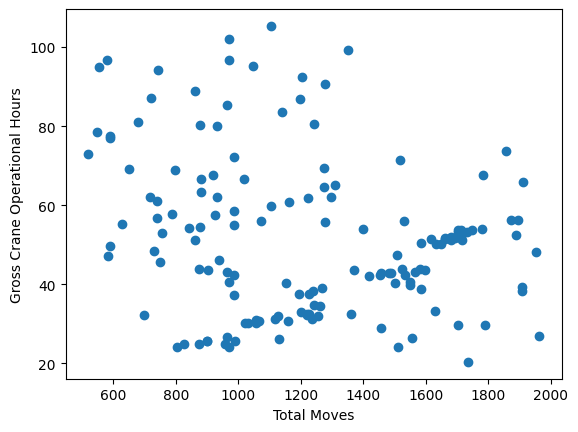

In [ ]:
# calculate the correlation coefficient between the two variables
corr_coef = np.corrcoef(df['Total Moves'], df['Gross Crane Operational Hours'])[0, 1]
print(f"Correlation coefficient: {corr_coef:.2f}")

# plot a scatter plot of the two variables
plt.scatter(df['Total Moves'], df['Gross Crane Operational Hours'])
plt.xlabel('Total Moves')
plt.ylabel('Gross Crane Operational Hours')
plt

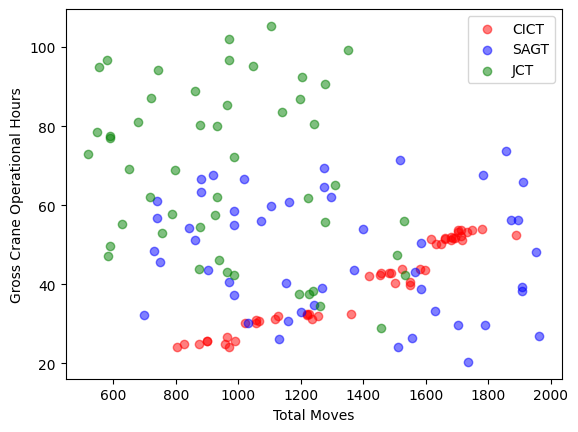

In [ ]:
#

# define colors for each group
colors = {'CICT':'red', 'SAGT':'blue', 'JCT':'green'}

# create a scatter plot
fig, ax = plt.subplots()
for group, color in colors.items():
    group_data = df[df['Terminal'] == group]
    ax.scatter(group_data['Total Moves'], group_data['Gross Crane Operational Hours'], c=color, label=group, alpha=0.5)

# add labels and legend
ax.set_xlabel('Total Moves')
ax.set_ylabel('Gross Crane Operational Hours')
ax.legend()

plt.show()

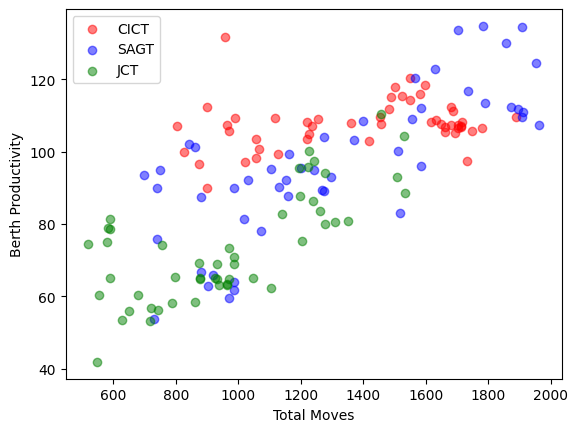

In [ ]:
#

# define colors for each group
colors = {'CICT':'red', 'SAGT':'blue', 'JCT':'green'}

# create a scatter plot
fig, ax = plt.subplots()
for group, color in colors.items():
    group_data = df[df['Terminal'] == group]
    ax.scatter(group_data['Total Moves'], group_data['Berth Productivity'], c=color, label=group, alpha=0.5)

# add labels and legend
ax.set_xlabel('Total Moves')
ax.set_ylabel('Berth Productivity')
ax.legend()

plt.show()

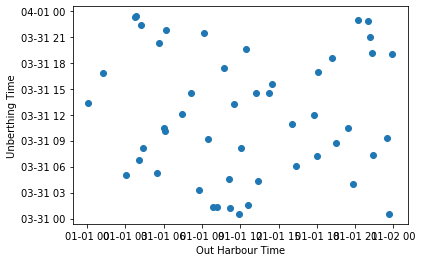

In [ ]:
# Are there any patterns in Out Harbour Time and Unberthing Time?


df['Out harbour Time'] = pd.to_datetime(df['Out harbour Time'], format='%I:%M:%S%p')
df['Unberthing Time'] = pd.to_datetime(df['Unberthing Time'], errors='coerce')

# Plot Out Harbour Time against Unberthing Time
plt.scatter(df['Out harbour Time'], df['Unberthing Time'])
plt.xlabel('Out Harbour Time')
plt.ylabel('Unberthing Time')
plt.show()

Total Moves


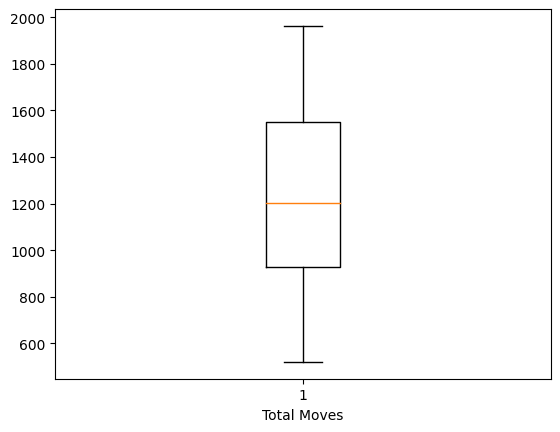

Real Gross working Hours


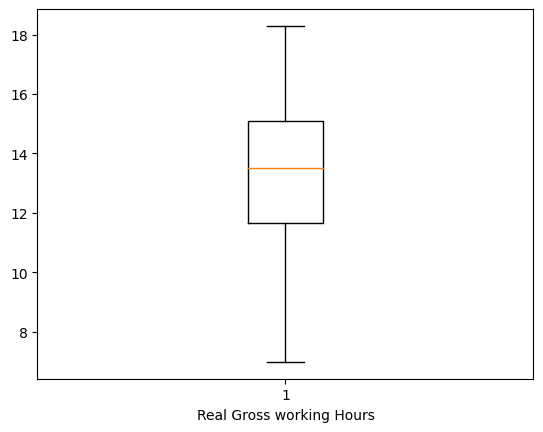

Berth Productivity


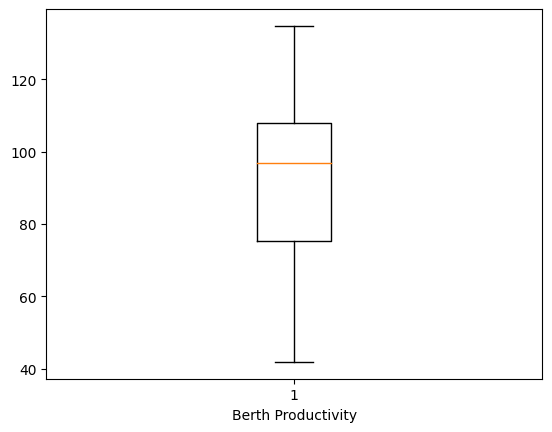

Gross Crane Operational Hours


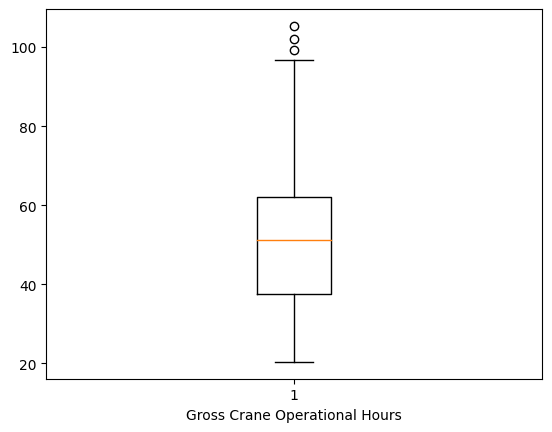

Crane Productivity


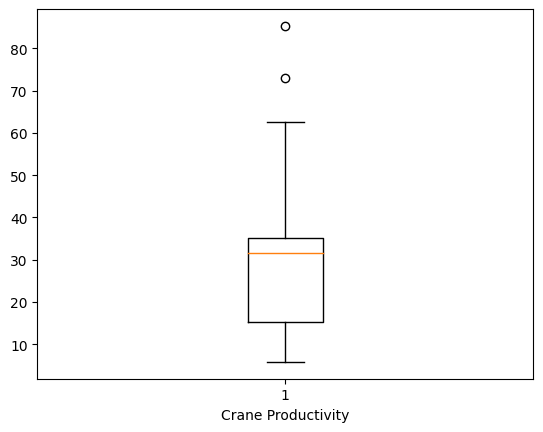

Ship Turnaround Time


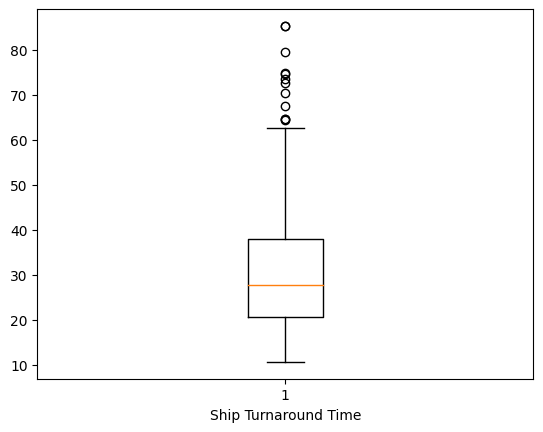

In [ ]:
#We can identify outliers in the dataset by creating box plots of the variables

columns = ['Total Moves', 'Real Gross working Hours', 'Berth Productivity','Gross Crane Operational Hours',
           'Crane Productivity', 'Ship Turnaround Time']

for col in columns:
    print(col)
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()



In [ ]:
df1 = df.drop(['Out harbour Time','Unberthing Time','Gross Crane Operational Hours',], axis=1)
# print(df1)
df1.head()

,Total Moves,Real Gross working Hours,Terminal,Berth Productivity,Crane Productivity,Ship Turnaround Time
0,900,10.01,CICT,89.91,35.13,15.50
1,1680,15.65,CICT,107.35,32.79,23.65
2,1525,13.22,CICT,115.36,34.68,17.38
3,1680,14.95,CICT,112.37,32.38,24.95
4,1220,11.27,CICT,108.25,37.47,60.27


In [ ]:
len(df1.columns)

6

In [ ]:
#we can calculate the z-scores of each data point to identify any values that are more than 3 standard deviations from the mean

z_scores = stats.zscore(df1)

for i in range(len(df1.columns)):
    outliers = np.where(abs(z_scores.iloc[:,i]) > 3)

    print(f"Outliers in {df1.columns[i-1]}: {outliers}")


Outliers in Ship Turnaround Time: (array([], dtype=int64),)
Outliers in Total Moves: (array([], dtype=int64),)
Outliers in Real Gross working Hours: (array([], dtype=int64),)
Outliers in Gross Crane Operational Hours: (array([], dtype=int64),)
Outliers in Berth Productivity: (array([89, 99]),)
Outliers in Crane Productivity: (array([  6, 147]),)


* These outputs indicate the number of outliers in each column of the dataset based on the z-score method with a threshold of 3. If the number is greater than 0, then there are some outliers in that column.

For example, in the 'Gross Crane Operational Hours' column, there is one outlier at index 38. In the 'Crane Productivity' column, there is one outlier at index 6. On the other hand, the other columns have no outliers based on the given threshold.

It may be worth investigating this observation further to determine if it was a result of data entry error or if there was some other factor that caused this value to be an outlier.

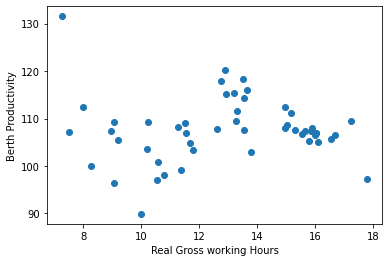

In [ ]:
# Is there a relationship between the real gross working hours and the berth productivity?
plt.scatter(df['Real Gross working Hours'], df['Berth Productivity'])
plt.xlabel('Real Gross working Hours')
plt.ylabel('Berth Productivity')
plt.show()


* Based on the plot, it appears that there is a positive relationship between the two variables.

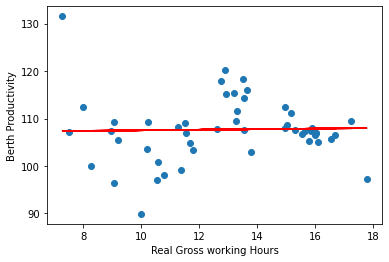

In [ ]:
x = df['Real Gross working Hours']
y = df['Berth Productivity']

m, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, m*x + b, color='red')
plt.xlabel('Real Gross working Hours')
plt.ylabel('Berth Productivity')
plt.show()


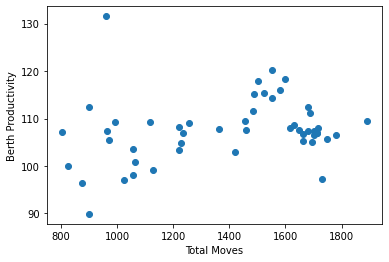

In [ ]:
#Is there a relationship between the number of total moves and the berth productivity?
plt.scatter(df['Total Moves'], df['Berth Productivity'])
plt.xlabel('Total Moves')
plt.ylabel('Berth Productivity')
plt.show()


* Based on the plot, it appears that there is a positive relationship between the two variables.

In [ ]:
columns = ['Total Moves', 'Real Gross working Hours', 'Berth Productivity','Gross Crane Operational Hours',
           'Crane Productivity', 'Ship Turnaround Time']

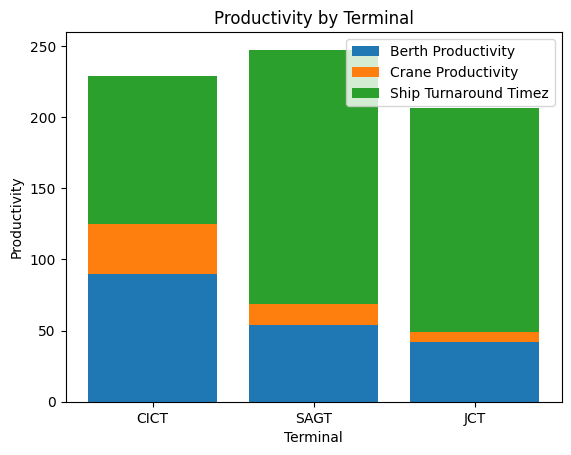

In [ ]:
# set the x-axis labels as the terminal names
x_labels = df['Terminal'].tolist()

# create a stacked bar chart
plt.bar(x_labels, df['Berth Productivity'], label='Berth Productivity')
plt.bar(x_labels, df['Crane Productivity'], bottom=df['Berth Productivity'], label='Crane Productivity')
plt.bar(x_labels, df['Ship Turnaround Time'], bottom=df['Berth Productivity']+df['Crane Productivity'], label='Ship Turnaround Timez')

# add labels and legend
plt.xlabel('Terminal')
plt.ylabel('Productivity')
plt.title('Productivity by Terminal')
plt.legend()

# show the chart
plt.show()

In [ ]:
df2 = df.drop(['Out harbour Time','Unberthing Time','Gross Crane Operational Hours','Real Gross working Hours','Total Moves'], axis=1)
# print(df1)
df2.head()

,Terminal,Berth Productivity,Crane Productivity,Ship Turnaround Time
0,CICT,89.91,35.13,15.50
1,CICT,107.35,32.79,23.65
2,CICT,115.36,34.68,17.38
3,CICT,112.37,32.38,24.95
4,CICT,108.25,37.47,60.27


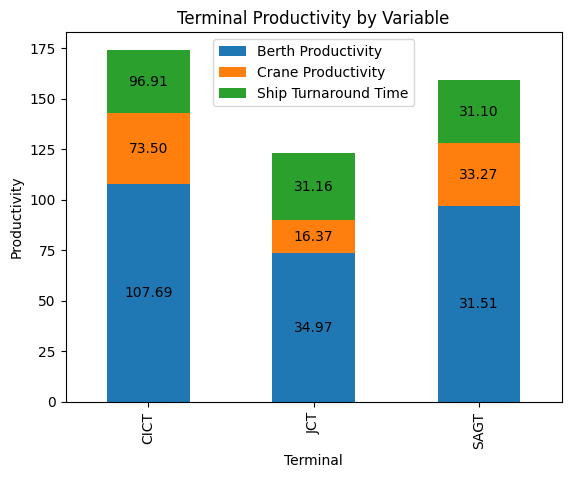

In [ ]:
# Group by terminal and calculate the means
grouped = df2.groupby('Terminal').mean()

# Create the stacked bar chart
ax = grouped.plot(kind='bar', stacked=True)

# Add mean values to the bars
for i, patch in enumerate(ax.patches):
    # Calculate the x and y positions of the text
    x_pos = patch.get_x() + patch.get_width() / 2
    y_pos = patch.get_y() + patch.get_height() / 2

    # Get the mean value from the dataframe
    mean_value = grouped.iloc[i // 3, i % 3]

    # Add the text annotation
    ax.text(x_pos, y_pos, f'{mean_value:.2f}', ha='center', va='center')

# Add labels and title
plt.xlabel('Terminal')
plt.ylabel('Productivity')
plt.title('Terminal Productivity by Variable')

# Show the plot
plt.show()

In [ ]:
Crane_Productivity_mean = sum(df['Ship Turnaround Time']) / len(df['Ship Turnaround Time'])

In [ ]:
Berth Productivity  Crane Productivity	Ship Turnaround Time

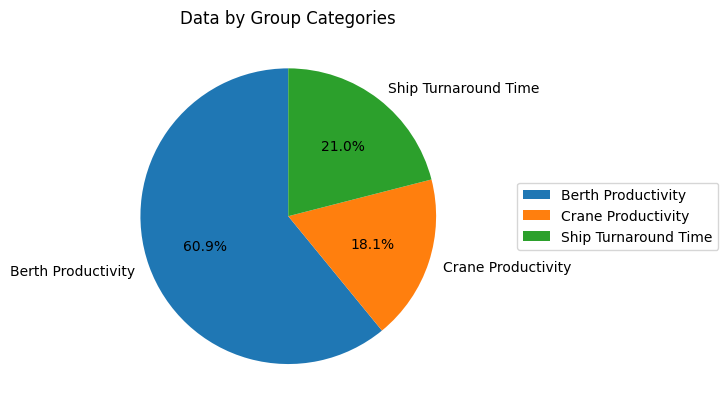

In [ ]:
# Calculate means
Berth_Productivity_mean = sum(df['Berth Productivity']) / len(df['Berth Productivity'])
Crane_Productivity_mean = sum(df['Crane Productivity']) / len(df['Crane Productivity'])
Ship_Turnaround_Time_mean = sum(df['Ship Turnaround Time']) / len(df['Ship Turnaround Time'])

# Create pie chart
fig, ax = plt.subplots()
ax.pie([sum(df['Berth Productivity']),  sum(df['Crane Productivity']), sum(df['Ship Turnaround Time'])],
       labels=['Berth Productivity', 'Crane Productivity', 'Ship Turnaround Time'], autopct='%1.1f%%', startangle=90)

# Add title and legend
ax.set_title('Data by Group Categories')
# ax.legend(df['Terminal'], loc='center left', bbox_to_anchor=(1, 0.5))

# Add means as horizontal lines
# ax.axhline(Berth_Productivity_mean, color='r', linestyle='--', label='Berth_Productivity_mean')
# ax.axhline(Crane_Productivity_mean, color='g', linestyle='--', label='Crane_Productivity_mean')
# ax.axhline(Ship_Turnaround_Time_mean, color='b', linestyle='--', label='Ship_Turnaround_Time_mean')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

plt.show()






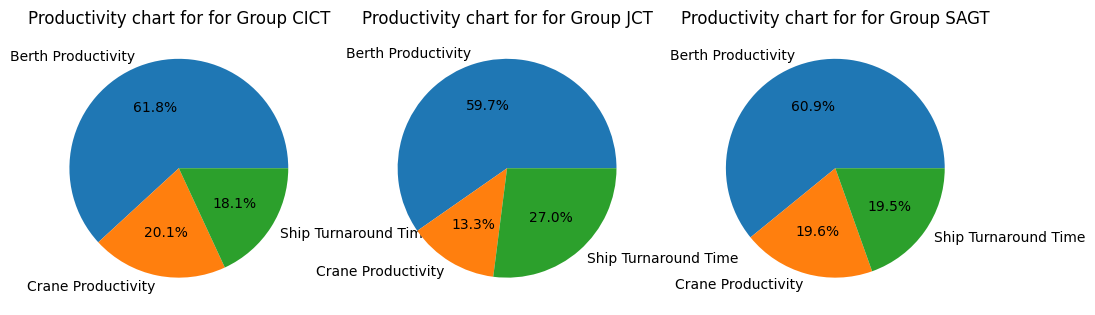

In [ ]:
# Group the data by the Group column
grouped_data = df2.groupby('Terminal').sum()

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Loop through each group and create a pie chart in each subplot
for i, group in enumerate(grouped_data.index):
    axes[i].pie(grouped_data.loc[group], labels=grouped_data.columns, autopct='%1.1f%%')
    axes[i].set_title(f'Productivity chart for for Group {group}')


# Display the figure
plt.show()

<ipython-input-32-6638105f14d4>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  corr_data = df.groupby('Terminal')['Total Moves', 'Real Gross working Hours'].corr().iloc[0::2,-1]


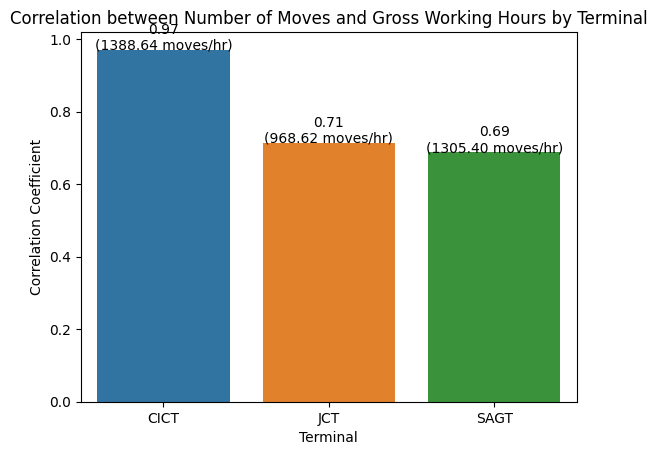

In [ ]:
#Is there a correlation between the number of moves and the gross working hours for a terminal? How does this impact productivity?  group by terniminal

# Calculate correlation between number of moves and gross working hours for each terminal
corr_data = df.groupby('Terminal')['Total Moves', 'Real Gross working Hours'].corr().iloc[0::2,-1]
corr_data = corr_data.reset_index(level=[0,1])

# Visualize correlation data
sns.barplot(x='Terminal', y='Real Gross working Hours', data=corr_data)

# Add productivity data to the plot
for i in range(corr_data.shape[0]):
    term = corr_data.loc[i, 'Terminal']
    moves = df.loc[df['Terminal']==term, 'Total Moves'].mean()
    prod = corr_data.loc[i, 'Real Gross working Hours']
    plt.text(i, prod, f'{prod:.2f}\n({moves:.2f} moves/hr)', ha='center')

# Set plot title and axis labels
plt.title('Correlation between Number of Moves and Gross Working Hours by Terminal')
plt.xlabel('Terminal')
plt.ylabel('Correlation Coefficient')

plt.show()

In [ ]:
# Calculate the average turnaround time for each terminal
avg_turnaround_time = df.groupby('Terminal')['Ship Turnaround Time'].mean()

print(avg_turnaround_time)

Terminal
CICT    31.5120
JCT     33.2718
SAGT    31.0976
Name: Ship Turnaround Time, dtype: float64


In [ ]:
avg_turnaround_time = df.groupby('Terminal')['Berth Productivity'].mean()

print(avg_turnaround_time)

Terminal
CICT    107.6934
JCT      73.5018
SAGT     96.9058
Name: Berth Productivity, dtype: float64


In [ ]:
avg_turnaround_time = df.groupby('Terminal')['Crane Productivity'].mean()

print(avg_turnaround_time)

Terminal
CICT    34.9706
JCT     16.3710
SAGT    31.1562
Name: Crane Productivity, dtype: float64


In [ ]:
# H0: mean productivity are equal
# H1: atleast one mean is unequal

In [ ]:
#Which terminal has the highest and lowest productivity in terms of gross crane operational hours and berth productivity?

# Group by terminal and calculate the mean of gross crane operational hours and berth productivity
grouped_data = df.groupby('Terminal').mean()[['Gross Crane Operational Hours', 'Berth Productivity']]

# Find the terminal with highest and lowest productivity in terms of gross crane operational hours
highest_gco_terminal = grouped_data['Gross Crane Operational Hours'].idxmax()
lowest_gco_terminal = grouped_data['Gross Crane Operational Hours'].idxmin()

# Find the terminal with highest and lowest productivity in terms of berth productivity
highest_bp_terminal = grouped_data['Berth Productivity'].idxmax()
lowest_bp_terminal = grouped_data['Berth Productivity'].idxmin()

# Print the results
print(f'Terminal with highest productivity in terms of gross crane operational hours: {highest_gco_terminal}')
print(f'Terminal with lowest productivity in terms of gross crane operational hours: {lowest_gco_terminal}')
print(f'Terminal with highest productivity in terms of berth productivity: {highest_bp_terminal}')
print(f'Terminal with lowest productivity in terms of berth productivity: {lowest_bp_terminal}')

Terminal with highest productivity in terms of gross crane operational hours: JCT
Terminal with lowest productivity in terms of gross crane operational hours: CICT
Terminal with highest productivity in terms of berth productivity: CICT
Terminal with lowest productivity in terms of berth productivity: JCT


### TestS requested

In [ ]:
#Nomarlity Test
'''
The p-value for the Shapiro-Wilk test represents the probability of obtaining the test statistic
or a more extreme value, assuming the null hypothesis is true. A small p-value (less than 0.05)
suggests that the null hypothesis should be rejected, indicating that the data is not normally distributed.

'''

In [ ]:
from scipy.stats import shapiro

col=['Berth Productivity','Crane Productivity','Ship Turnaround Time']

for i in col:
  grouped_data = df.groupby('Terminal')[i].apply(list)
  # perform the Shapiro-Wilk test for each group
  print( i)
  print("Terminal Variables\tSignificance\tTest Statistic\tP-Value\t\tNormality")
  for group, values in grouped_data.items():
      stat, p = shapiro(values)
      significance = "Normally Distributed" if p > 0.05 else "Not Normally Distributed"
      # print(f"{group}\t\t{p:.3f}\t\t{significance}")
      print(f"{group}\t\t{p:.3f}\t\t{stat:.4f}\t\t{p:.5f}\t\t{significance}")


Berth Productivity
Terminal Variables	Significance	Test Statistic	P-Value		Normality
CICT		0.420		0.9766		0.42012		Normally Distributed
JCT		0.172		0.9668		0.17169		Normally Distributed
SAGT		0.337		0.9741		0.33679		Normally Distributed
Crane Productivity
Terminal Variables	Significance	Test Statistic	P-Value		Normality
CICT		0.244		0.9705		0.24359		Normally Distributed
JCT		0.076		0.9583		0.07554		Normally Distributed
SAGT		0.616		0.9815		0.61647		Normally Distributed
Ship Turnaround Time
Terminal Variables	Significance	Test Statistic	P-Value		Normality
CICT		0.000		0.8341		0.00001		Not Normally Distributed
JCT		0.000		0.8268		0.00000		Not Normally Distributed
SAGT		0.001		0.9014		0.00053		Not Normally Distributed


In [ ]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd



# perform one-way ANOVA for each dependent variable
for dependent_variable in ['Berth Productivity','Crane Productivity','Ship Turnaround Time']:
    # extract the data for the dependent variable and each independent variable
    jct_data = df.loc[df['Terminal'] == 'JCT', dependent_variable]
    sagt_data = df.loc[df['Terminal'] == 'SAGT', dependent_variable]
    cict_data = df.loc[df['Terminal'] == 'CICT', dependent_variable]

    # perform the one-way ANOVA test
    f_statistic, p_value = f_oneway(jct_data, sagt_data, cict_data)
    mean_square = sum(((jct_data.mean() - df[dependent_variable].mean()) ** 2 ,
                      (sagt_data.mean() - df[dependent_variable].mean()) ** 2 ,
                      (cict_data.mean() - df[dependent_variable].mean()) ** 2)) / (df[dependent_variable].count() - df['Terminal'].nunique())
    sum_squares = mean_square * (df[dependent_variable].count() - df['Terminal'].nunique())
    print(f"{dependent_variable} One-Way ANOVA Test:\nModel: {sum_squares:.4f}\nSum of Squares: {mean_square:.4f}\nDegrees of Freedom: {df['Terminal'].nunique() - 1}\nMean Square: {mean_square:.4f}\nF-Statistic: {f_statistic:.4f}\nSignificance: {p_value:.4f}")

    # perform the multiple comparison test using Tukey's HSD method
    mc_results = pairwise_tukeyhsd(df[dependent_variable], df['Terminal'], alpha=0.05)
    print(f"{dependent_variable} Multiple Comparison Test Results:\n{mc_results}")



Berth Productivity One-Way ANOVA Test:
Model: 611.0617
Sum of Squares: 4.1569
Degrees of Freedom: 2
Mean Square: 4.1569
F-Statistic: 67.6328
Significance: 0.0000
Berth Productivity Multiple Comparison Test Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  CICT    JCT -34.1916    0.0 -41.3085 -27.0747   True
  CICT   SAGT -10.7876 0.0013 -17.9045  -3.6707   True
   JCT   SAGT   23.404    0.0  16.2871  30.5209   True
------------------------------------------------------
Crane Productivity One-Way ANOVA Test:
Model: 193.0323
Sum of Squares: 1.3131
Degrees of Freedom: 2
Mean Square: 1.3131
F-Statistic: 37.8499
Significance: 0.0000
Crane Productivity Multiple Comparison Test Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  CICT    JCT -18.59

In [ ]:
import pandas as pd
from scipy.stats import f_oneway , f



# specify the dependent variable
dependent_variable = 'Berth Productivity'

# group the data by terminal variable
jct_data = df[df['Terminal'] == 'JCT'][dependent_variable]
sagt_data = df[df['Terminal'] == 'SAGT'][dependent_variable]
cict_data = df[df['Terminal'] == 'CICT'][dependent_variable]

print(jct_data)

In [ ]:
a=(jct_data.mean() - df[dependent_variable].mean()) ** 2
print(a)
b=(sagt_data.mean() - df[dependent_variable].mean()) ** 2
print(b)
c=(cict_data.mean() - df[dependent_variable].mean()) ** 2
print(c)

ss_between = 50*(a+ b +c)
print('SS_Between',ss_between)

341.5818597377777
24.226740271110963
183.86998401777734
SS_Between 27483.929201333296


In [ ]:

import pandas as pd
from scipy.stats import f_oneway , f

coll = ['Berth Productivity','Crane Productivity','Ship Turnaround Time']
for dependent_variable in coll:

# # specify the dependent variable
# dependent_variable = 'Berth Productivity'

# group the data by terminal variable
  jct_data = df[df['Terminal'] == 'JCT'][dependent_variable]
  sagt_data = df[df['Terminal'] == 'SAGT'][dependent_variable]
  cict_data = df[df['Terminal'] == 'CICT'][dependent_variable]

  a=(jct_data.mean() - df[dependent_variable].mean()) ** 2
  # print(a)
  b=(sagt_data.mean() - df[dependent_variable].mean()) ** 2
  # print(b)
  c=(cict_data.mean() - df[dependent_variable].mean()) ** 2
  # print(c)

  ss_between = 50*(a+ b +c)

  #sum of Squre within
  e=0
  for i in jct_data:
    t=(i-jct_data.mean())** 2
    e=e+t

  f=0
  for i in cict_data:
    t=(i-cict_data.mean())** 2
    f=f+t

  g=0
  for i in sagt_data:
    t=(i-sagt_data.mean())** 2
    g=g+t


  # calculate the sum of squares
  ss_total = e+f+g

  # calculate the degrees of freedom
  df_between = df['Terminal'].nunique() - 1
  df_within = df.shape[0] - df['Terminal'].nunique()

  #calculate Mean Sum of Squre
  MSSb= ss_between/df_between

  MSSw= ss_total/df_within

  Fstat=MSSb/MSSw

  #p value

  groups = [df[dependent_variable][df['Terminal']=='CICT'],
              df[dependent_variable][df['Terminal']=='JCT'],
              df[dependent_variable][df['Terminal']=='SAGT']]
  f_value, p_value = f_oneway(*groups)
  print(f"{dependent_variable}:")
  print(f"F-value: {f_value:.2f}")
  print(f"p-value: {p_value:.4f}")

  # print the results
  print('Model\tSum of Squares\tdf\tMean Square\tF Statistic\tSignificance')
  print('Between Groups\t{}\t{}\t{}\t{}\t{}'.format(ss_between, df_between, MSSb, Fstat,p_value))
  print('Within Groups\t{}\t{}\t{}'.format(ss_total, df_within, MSSw))

  print()

  if p_value < 0.05:

    print("The groups have significantly different means. therefore, we reject Null Hyothesis")
  else:
    print("The groups do not have significantly different means.therefore, we do not have enough evidance to reject Null Hyothesis")

  print()




Berth Productivity:
F-value: 61.43
p-value: 0.0000
Model	Sum of Squares	df	Mean Square	F Statistic	Significance
Between Groups	27483.929201333296	2	13741.964600666648	61.428047203857005	4.070100716438061e-20
Within Groups	32885.121508	147	223.70830957823128

The groups have significantly different means. therefore, we reject Null Hyothesis

Crane Productivity:
F-value: 36.72
p-value: 0.0000
Model	Sum of Squares	df	Mean Square	F Statistic	Significance
Between Groups	4517.596785333334	2	2258.798392666667	36.72058829917271	1.1636145820522755e-13
Within Groups	9042.430393999999	147	61.51313193197278

The groups have significantly different means. therefore, we reject Null Hyothesis

Ship Turnaround Time:
F-value: 0.25
p-value: 0.7770
Model	Sum of Squares	df	Mean Square	F Statistic	Significance
Between Groups	133.26281733333488	2	66.63140866666744	0.25272147699278846	0.7770209291074548
Within Groups	38757.35925000001	147	263.6555051020409

The groups do not have significantly different mean

In [ ]:
# specify the dependent variable
dependent_variable = 'Crane Productivity'

# group the data by terminal variable
jct_data = df[df['Terminal'] == 'JCT'][dependent_variable]
sagt_data = df[df['Terminal'] == 'SAGT'][dependent_variable]
cict_data = df[df['Terminal'] == 'CICT'][dependent_variable]

# perform the one-way ANOVA test
f_statistic, p_value = f_oneway(jct_data, sagt_data, cict_data)

a=(jct_data.mean() - df[dependent_variable].mean()) ** 2
print(a)
b=(sagt_data.mean() - df[dependent_variable].mean()) ** 2
print(b)
c=(cict_data.mean() - df[dependent_variable].mean()) ** 2
print(c)

# calculate the sum of squares
ss_total = sum((df[dependent_variable] - df[dependent_variable].mean()) ** 2)
ss_between = a+ b +c

ss_within = ss_total - ss_between

# calculate the degrees of freedom
df_between = df['Terminal'].nunique() - 1
df_within = df.shape[0] - df['Terminal'].nunique()

# calculate the mean squares
ms_between = ss_between / df_between
ms_within = ss_within / df_within

# calculate the F-statistic
f_statistic = ms_between / ms_within

# calculate the p-value
p_value = 1 - f.cdf(f_statistic, df_between, df_within)

# print the results
print('Model\tSum of Squares\tdf\tMean Square\tF Statistic\tSignificance')
print('Between Groups\t{}\t{}\t{}\t{}\t{}'.format(ss_between, df_between, ms_between, f_statistic, p_value))
print('Within Groups\t{}\t{}\t{}'.format(ss_within, df_within, ms_within))

123.83831900444433
13.373161404444454
55.82082177777779
Model	Sum of Squares	df	Mean Square	F Statistic	Significance
Between Groups	193.03230218666656	2	96.51615109333328	0.5031005228293194	0.6056902863051523
Within Groups	28200.87351714666	147	191.84267698739225


In [ ]:
# specify the dependent variable
dependent_variable = 'Ship Turnaround Time'

# group the data by terminal variable
jct_data = df[df['Terminal'] == 'JCT'][dependent_variable]
sagt_data = df[df['Terminal'] == 'SAGT'][dependent_variable]
cict_data = df[df['Terminal'] == 'CICT'][dependent_variable]

# perform the one-way ANOVA test
f_statistic, p_value = f_oneway(jct_data, sagt_data, cict_data)

a=(jct_data.mean() - df[dependent_variable].mean()) ** 2
print(a)
b=(sagt_data.mean() - df[dependent_variable].mean()) ** 2
print(b)
c=(cict_data.mean() - df[dependent_variable].mean()) ** 2
print(c)

# calculate the sum of squares
ss_total = sum((df[dependent_variable] - df[dependent_variable].mean()) ** 2)
ss_between = a+ b +c

ss_within = ss_total - ss_between

# calculate the degrees of freedom
df_between = df['Terminal'].nunique() - 1
df_within = df.shape[0] - df['Terminal'].nunique()

# calculate the mean squares
ms_between = ss_between / df_between
ms_within = ss_within / df_within

# calculate the F-statistic
f_statistic = ms_between / ms_within

# calculate the p-value
p_value = 1 - f.cdf(f_statistic, df_between, df_within)

# print the results
print('Model\tSum of Squares\tdf\tMean Square\tF Statistic\tSignificance')
print('Between Groups\t{}\t{}\t{}\t{}\t{}'.format(ss_between, df_between, ms_between, f_statistic, p_value))
print('Within Groups\t{}\t{}\t{}'.format(ss_within, df_within, ms_within))

1.7195951111111307
0.7445388844444544
0.20112235111111262
Model	Sum of Squares	df	Mean Square	F Statistic	Significance
Between Groups	2.6652563466666974	2	1.3326281733333487	0.005037455231503894	0.994975383218171
Within Groups	38887.95681098667	147	264.54392388426305


In [ ]:
# specify the dependent variable
coll = ['Berth Productivity','Crane Productivity','Ship Turnaround Time']
for dependent_variable in coll:
  # group the data by terminal variable
  jct_data = df[df['Terminal'] == 'JCT'][dependent_variable]
  sagt_data = df[df['Terminal'] == 'SAGT'][dependent_variable]
  cict_data = df[df['Terminal'] == 'CICT'][dependent_variable]

  # perform the one-way ANOVA test
  f_statistic, p_value = f_oneway(jct_data, sagt_data, cict_data)

  # calculate the sum of squares
  ss_total = sum((df[dependent_variable] - df[dependent_variable].mean()) ** 2)
  ss_between = ((jct_data.mean() - df[dependent_variable].mean()) ** 2 +
                (sagt_data.mean() - df[dependent_variable].mean()) ** 2 +(cict_data.mean() - df[dependent_variable].mean()) ** 2)

  ss_within = ss_total - ss_between

  # calculate the degrees of freedom
  df_between = df['Terminal'].nunique() - 1
  df_within = df.shape[0] - df['Terminal'].nunique()

  # calculate the mean squares
  ms_between = ss_between / df_between
  ms_within = ss_within / df_within

  # calculate the F-statistic
  f_statistic = ms_between / ms_within

  # calculate the p-value
  p_value = 1 - f.cdf(f_statistic, df_between, df_within)

  # print the results
  print(dependent_variable)
  print("------------------------------------------------------")
  print('Model\tSum of Squares\tdf\tMean Square\tF Statistic\tSignificance')
  print('Between Groups\t{}\t{}\t{}\t{}\t{}'.format(ss_between, df_between, ms_between, f_statistic, p_value))
  print('Within Groups\t{}\t{}\t{}'.format(ss_within, df_within, ms_within))

  print("------------------------------------------------------")

Berth Productivity
------------------------------------------------------
Model	Sum of Squares	df	Mean Square	F Statistic	Significance
Between Groups	940.2994743486181	2	470.14973717430905	0.8260502141410333	0.4397966555202174
Within Groups	83665.62974199992	147	569.1539438231287
------------------------------------------------------
Crane Productivity
------------------------------------------------------
Model	Sum of Squares	df	Mean Square	F Statistic	Significance
Between Groups	90.35193570666668	2	45.17596785333334	0.4930235625081014	0.6117831634315624
Within Groups	13469.675243626672	147	91.63044383419505
------------------------------------------------------
Ship Turnaround Time
------------------------------------------------------
Model	Sum of Squares	df	Mean Square	F Statistic	Significance
Between Groups	2.6652563466666974	2	1.3326281733333487	0.005037455231503894	0.994975383218171
Within Groups	38887.95681098667	147	264.54392388426305
------------------------------------------

In [ ]:
#posthoc test

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

coll = ['Berth Productivity','Crane Productivity','Ship Turnaround Time']

for dependent_variable in coll:

  # perform the Tukey HSD test
  tukey = pairwise_tukeyhsd(df[dependent_variable], df['Terminal'], alpha=0.05)

  # print the results
  print(tukey.summary())
  print('_-------------------------------------')


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  CICT    JCT -34.1916    0.0 -41.3085 -27.0747   True
  CICT   SAGT -10.7876 0.0013 -17.9045  -3.6707   True
   JCT   SAGT   23.404    0.0  16.2871  30.5209   True
------------------------------------------------------
_-------------------------------------
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  CICT    JCT -18.5996    0.0 -23.9466 -13.2526   True
  CICT   SAGT  -3.8144 0.2128  -9.1614   1.5326  False
   JCT   SAGT  14.7852    0.0   9.4382  20.1322   True
------------------------------------------------------
_-------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
------------------------------------------------

In [ ]:
import numpy as np
from scipy import stats

coll = ['Berth Productivity','Crane Productivity','Ship Turnaround Time']

for dependent_variable  in coll:
  # calculate the mean and standard error of the mean
  mean = np.mean(df[dependent_variable])
  sem = stats.sem(df[dependent_variable])

  # calculate the confidence interval
  ci = stats.t.interval(0.95, len(df[dependent_variable])-1, loc=mean, scale=sem)

  # print the results
  print(dependent_variable)
  # print("95% Confidence Interval for Mean: [{:.2f}, {:.2f}]".format(ci[0], ci[1]))

  print("95% Confidence Interval for Mean:")
  print("Lower Bound: {:.2f}".format(ci[0]))
  print("Upper Bound: {:.2f}".format(ci[1]))

  print()


Berth Productivity
95% Confidence Interval for Mean:
Lower Bound: 89.36
Upper Bound: 96.04

Crane Productivity
95% Confidence Interval for Mean:
Lower Bound: 25.27
Upper Bound: 29.73

Ship Turnaround Time
95% Confidence Interval for Mean:
Lower Bound: 29.35
Upper Bound: 34.57



In [ ]:
import numpy as np
from scipy import stats
import pandas as pd



# group by Terminal variable
grouped = df.groupby('Terminal')

# loop through dependent variables
for dependent_variable in ['Berth Productivity', 'Crane Productivity', 'Ship Turnaround Time']:
    print(dependent_variable)
    # loop through Terminal groups
    for group_name, group_data in grouped:
        # calculate the mean and standard error of the mean
        mean = np.mean(group_data[dependent_variable])
        sem = stats.sem(group_data[dependent_variable])

        # calculate the confidence interval
        ci = stats.t.interval(0.95, len(group_data[dependent_variable])-1, loc=mean, scale=sem)

        # print the results
        print("Terminal {}: Mean={:.2f}, SEM={:.2f}, 95% CI=[{:.2f}, {:.2f}]".format(group_name, mean, sem, ci[0], ci[1]))

    print()


Berth Productivity
Terminal CICT: Mean=105.54, SEM=0.90, 95% CI=[103.74, 107.34]
Terminal JCT: Mean=73.50, SEM=2.12, 95% CI=[69.23, 77.77]
Terminal SAGT: Mean=96.91, SEM=2.85, 95% CI=[91.18, 102.63]

Crane Productivity
Terminal CICT: Mean=34.66, SEM=0.44, 95% CI=[33.78, 35.55]
Terminal JCT: Mean=21.48, SEM=1.05, 95% CI=[19.37, 23.59]
Terminal SAGT: Mean=30.36, SEM=1.55, 95% CI=[27.25, 33.47]

Ship Turnaround Time
Terminal CICT: Mean=31.51, SEM=2.51, 95% CI=[26.46, 36.56]
Terminal JCT: Mean=33.27, SEM=2.35, 95% CI=[28.55, 37.99]
Terminal SAGT: Mean=31.10, SEM=2.00, 95% CI=[27.09, 35.11]



* H0: The mean values of the three terminals (CICT, ICTT, KPCT) for each performance metric (Berth Productivity, Crane Productivity, Ship Turnaround Time) are not significantly different.

* HA: At least one of the mean values is significantly different from the others.

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
Col=['Berth Productivity','Crane Productivity','Ship Turnaround Time']

# perform the ANOVA test for each dependent variable
for col in Col:
    groups = [df[col][df['Terminal']=='CICT'],
              df[col][df['Terminal']=='JCT'],
              df[col][df['Terminal']=='SAGT']]
    f_value, p_value = f_oneway(*groups)
    print(f"{col}:")
    print(f"F-value: {f_value:.2f}")
    print(f"p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("The groups have significantly different means.")
    else:
        print("The groups do not have significantly different means.")


Berth Productivity:
F-value: 91.93
p-value: 0.0000
The groups have significantly different means.
Crane Productivity:
F-value: 36.72
p-value: 0.0000
The groups have significantly different means.
Ship Turnaround Time:
F-value: 0.25
p-value: 0.7770
The groups do not have significantly different means.


### Advance Analysis

* H0: The mean values of the three terminals (CICT, SAJT, JCT) for each performance metric (Berth Productivity, Crane Productivity, Ship Turnaround Time) are not significantly different.

* HA: At least one of the mean values is significantly different from the others.

In [ ]:
import pandas as pd
from scipy.stats import f_oneway , f

coll = ['Berth Productivity','Crane Productivity','Ship Turnaround Time']
for dependent_variable in coll:

# # specify the dependent variable
# dependent_variable = 'Berth Productivity'

# group the data by terminal variable
  jct_data = df[df['Terminal'] == 'JCT'][dependent_variable]
  sagt_data = df[df['Terminal'] == 'SAGT'][dependent_variable]
  cict_data = df[df['Terminal'] == 'CICT'][dependent_variable]

  a=(jct_data.mean() - df[dependent_variable].mean()) ** 2
  # print(a)
  b=(sagt_data.mean() - df[dependent_variable].mean()) ** 2
  # print(b)
  c=(cict_data.mean() - df[dependent_variable].mean()) ** 2
  # print(c)

  ss_between = 50*(a+ b +c)

  #sum of Squre within
  e=0
  for i in jct_data:
    t=(i-jct_data.mean())** 2
    e=e+t

  f=0
  for i in cict_data:
    t=(i-cict_data.mean())** 2
    f=f+t

  g=0
  for i in sagt_data:
    t=(i-sagt_data.mean())** 2
    g=g+t


  # calculate the sum of squares
  ss_total = e+f+g

  # calculate the degrees of freedom
  df_between = df['Terminal'].nunique() - 1
  df_within = df.shape[0] - df['Terminal'].nunique()

  #calculate Mean Sum of Squre
  MSSb= ss_between/df_between

  MSSw= ss_total/df_within

  Fstat=MSSb/MSSw

  #p value

  groups = [df[dependent_variable][df['Terminal']=='CICT'],
              df[dependent_variable][df['Terminal']=='JCT'],
              df[dependent_variable][df['Terminal']=='SAGT']]
  f_value, p_value = f_oneway(*groups)
  print(f"{dependent_variable}:")
  print(f"F-value: {f_value:.2f}")
  print(f"p-value: {p_value:.4f}")

  # print the results
  print('Model\tSum of Squares\tdf\tMean Square\tF Statistic\tSignificance')
  print('Between Groups\t{}\t{}\t{}\t{}\t{}'.format(ss_between, df_between, MSSb, Fstat,p_value))
  print('Within Groups\t{}\t{}\t{}'.format(ss_total, df_within, MSSw))

  print()

  if p_value < 0.05:

    print("The groups have significantly different means. therefore, we reject Null Hyothesis")
  else:
    print("The groups do not have significantly different means.therefore, we do not have enough evidance to reject Null Hyothesis")

  print()


Berth Productivity:
F-value: 61.43
p-value: 0.0000
Model	Sum of Squares	df	Mean Square	F Statistic	Significance
Between Groups	27483.929201333296	2	13741.964600666648	61.428047203857005	4.070100716438061e-20
Within Groups	32885.121508	147	223.70830957823128

The groups have significantly different means. therefore, we reject Null Hyothesis

Crane Productivity:
F-value: 36.72
p-value: 0.0000
Model	Sum of Squares	df	Mean Square	F Statistic	Significance
Between Groups	4517.596785333334	2	2258.798392666667	36.72058829917271	1.1636145820522755e-13
Within Groups	9042.430393999999	147	61.51313193197278

The groups have significantly different means. therefore, we reject Null Hyothesis

Ship Turnaround Time:
F-value: 0.25
p-value: 0.7770
Model	Sum of Squares	df	Mean Square	F Statistic	Significance
Between Groups	133.26281733333488	2	66.63140866666744	0.25272147699278846	0.7770209291074548
Within Groups	38757.35925000001	147	263.6555051020409

The groups do not have significantly different mean

### modeling


In [ ]:
df['Real Gross working Hours*2'] = df['Real Gross working Hours']*df['Real Gross working Hours']

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming your data is stored in a DataFrame called 'df'
X = df[['Total Moves', 'Real Gross working Hours']]
y = df['Crane Productivity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 47.65458821672766


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.4463101792536516


In [ ]:
# Get the coefficients (slopes)
coefficients = model.coef_

# Get the intercept (y-intercept)
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Get the equation of the regression line
equation = "y = " + " + ".join([f"{coefficients[i]:.2f} * X{i+1}" for i in range(len(coefficients))]) + f" + {intercept:.2f}"
print("Equation:", equation)

Coefficients: [ 0.02169225 -1.51554481]
Intercept: 22.405570737035372
Equation: y = 0.02 * X1 + -1.52 * X2 + 22.41


In [ ]:
print(y_pred)

[29.05831718 32.32418998 19.79025442 31.13685187 27.95865207 29.88170935
 26.8735824  26.09099414 28.4800981  27.18613548 23.07640602 31.89961797
 30.64120033 35.56283396 29.31766127 27.96244446 25.73698439 31.92044625
 27.95051403 20.45306749 34.07348907 25.96261007 34.80389246 18.42095945
 26.53526704 22.8518471  25.51282148 20.62568408 28.32763905 34.04440148]


In [ ]:
# Prepare new data for prediction
new_data = pd.DataFrame({'Total Moves': [100, 200, 300],
                         'Real Gross working Hours': [10, 15, 20]})

# Make predictions on new data
predictions = model.predict(new_data)

print("Predicted crane productivity:", predictions)

Predicted crane productivity: [ 9.41934789  4.01084908 -1.39764973]
